# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?


**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import Python Modules

In [14]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## Loading the Data

To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized.

Here **all_data.csv** will be read in into a DataFrame called `data`, followed by a quick inspection of the DataFrame using `.head()` to check its contents.

In [15]:
data = pd.read_csv("all_data.csv")
print(data.head())



  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## EDA - Exploratory Data Analysis

Firstly to check if all data are in expected data type. Expected Countires as strings, years, life expectancy and GDP as numbers (different types).

In [16]:
print(data.info())
print(data[data.isnull().any(axis=1)])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Empty DataFrame
Columns: [Country, Year, Life expectancy at birth (years), GDP]
Index: []


There is no null/NaN values...

Exploration about the countries that are represented in `data`. There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [17]:
print(data.Country.unique())
print(data.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Data cleaning:
1. Column name rename. Noticed that some columns name as "Life expectancy as birth (years)" is too long for graphs and variables.
2. Value "United States of Amertca" to USA with similar problem as above

In [18]:
data.rename(columns={"Country":"country", "Year":"year","Life expectancy at birth (years)":"life_exp", "GDP":"gdp"}, inplace=True)
data.country= data.country.replace({"United States of America": "USA"})
data.columns

Index(['country', 'year', 'life_exp', 'gdp'], dtype='object')

## Life expectancy per country

The first plot is Life Expectancy and all of the countries except for Zimbabwe have values in the mid-to-high 70s.
Life expectancy in Chile, China, Germany, Mexico and USA is much higher compared to Zimbabwe.
Also, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the low 40s to the high 60s. This could tell us that various factors may affect life expectancy in this African country, presence of deseases (in particular HIV/AIDS  pandemic), maternal mortality,  economic crisis since 2000s which affected health care system, etc.

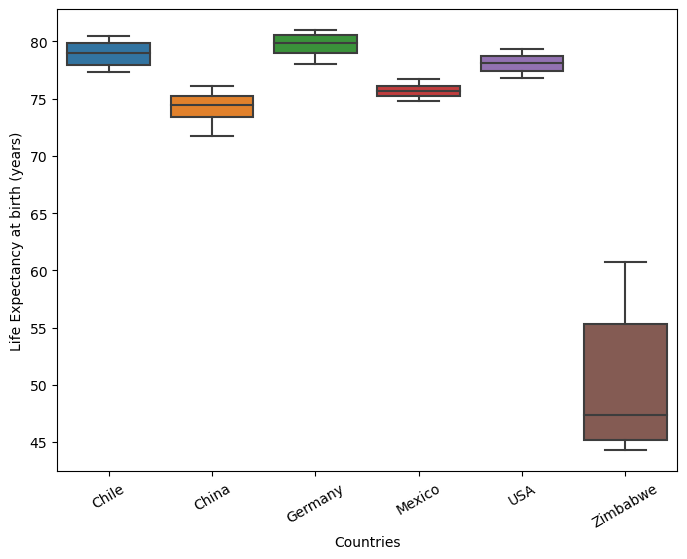

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x=data.country, y=data.life_exp)
plt.xticks(rotation=30)
plt.ylabel("Life Expectancy at birth (years)")
plt.xlabel("Countries")
plt.show()

## GDP per Country

For the average `GDP` by `Country` it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

<Figure size 640x480 with 0 Axes>

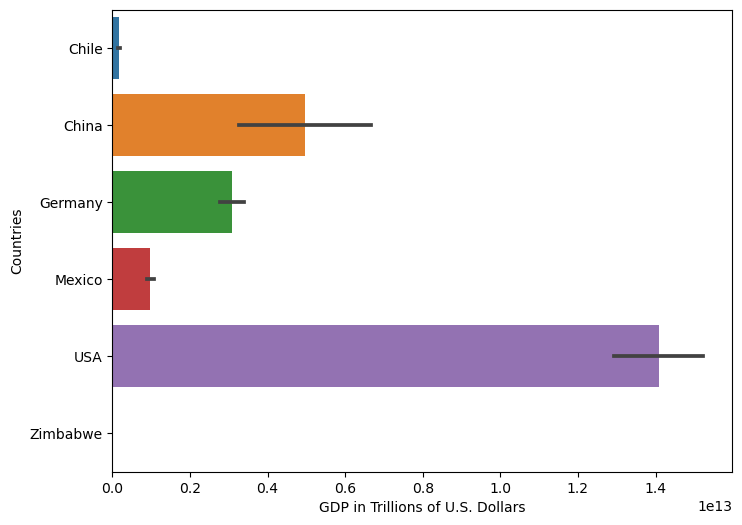

In [23]:
plt.clf()
plt.figure(figsize=(8,6))
sns.barplot(data=data, x=data.gdp, y=data.country)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.ylabel("Countries")
plt.show()

In countries with higher GDP live expectancy is higher

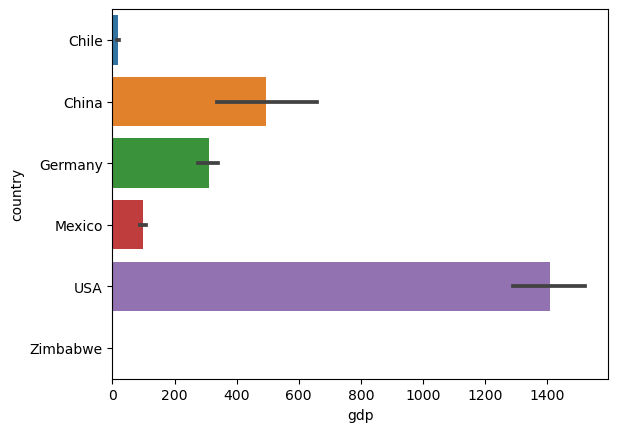

In [46]:
plt.clf()
#data['log_gdp'] = np.log(data.gdp)
sns.barplot(data=data, x=data.gdp/10000000000, y=data.country)
plt.show()

### Trends

Next the data will explore `Life Expectancy` and `GDP` over the years through line charts. Below the countries are separated by colors.
Giving the followng trend in life expectancy, life in Zimbave got longer in perod from 2006. faster than other countries in comparision. In the countries like China, Germany and USA, life expectancy raised almost linarly. 

<Figure size 640x480 with 0 Axes>

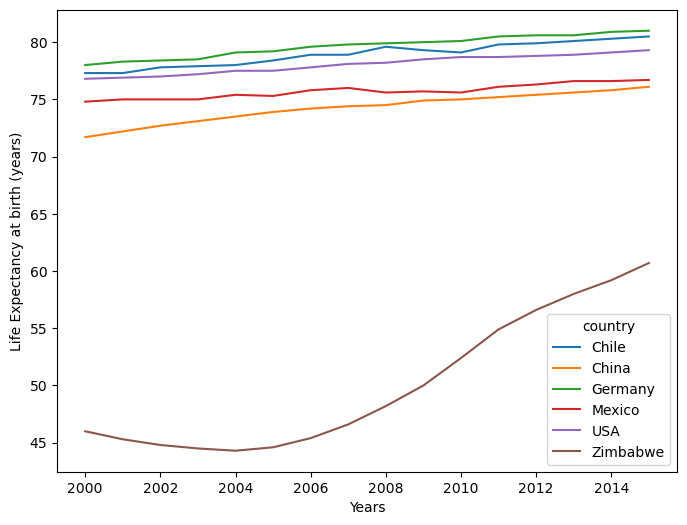

In [26]:
plt.clf()
plt.figure(figsize=(8,6))
sns.lineplot(data=data, x=data.year, y=data.life_exp, hue=data.country)
plt.ylabel("Life Expectancy at birth (years)")
plt.xlabel("Years")
plt.show()

It is apparent that Chile, and Mexico seemed to have dips in their life expectancy around the same time which could be looked into further. This type of plotting proves useful since much of these nuances were lost when the y axis was shared among the countries. Also the seemingly linear changes were in reality was not as smooth for some of the countries.

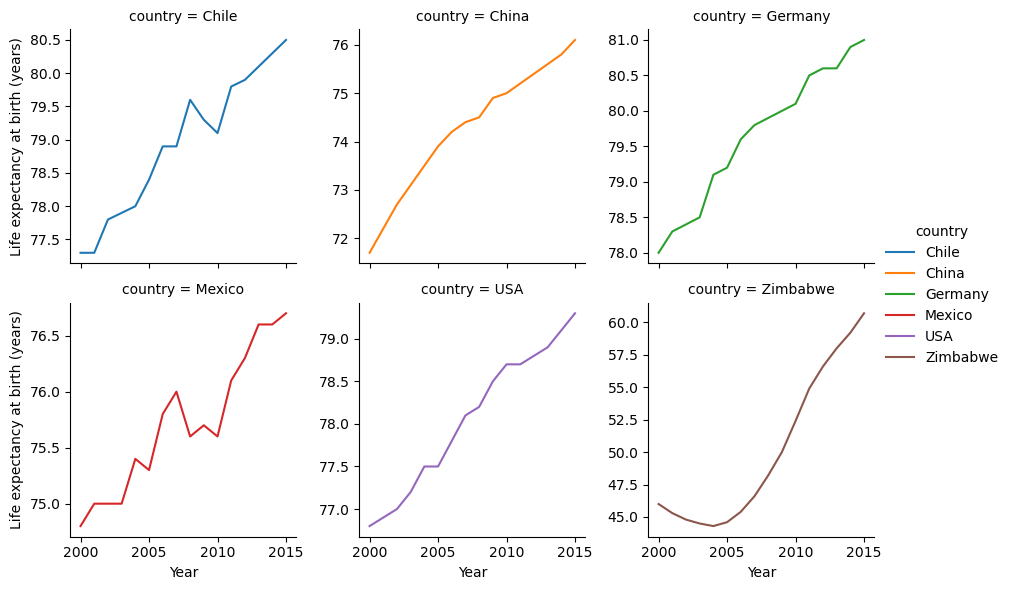

In [43]:
graphLE = sns.FacetGrid(data, col="country", hue="country", col_wrap=3, sharey=False)

graphLE = (graphLE.map(sns.lineplot,"year","life_exp")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))
graphLE


Next, `GDP`, one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

<Figure size 640x480 with 0 Axes>

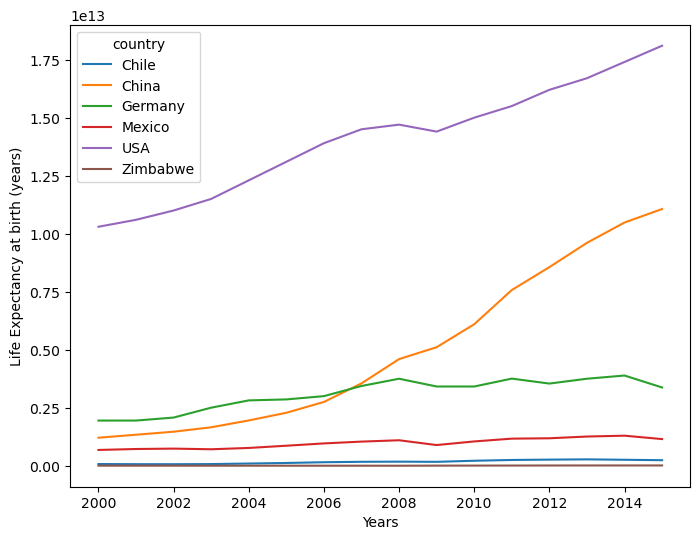

In [44]:
plt.clf()
plt.figure(figsize=(8,6))
sns.lineplot(data=data, x=data.year, y=data.gdp, hue=data.country)
plt.ylabel("Life Expectancy at birth (years)")
plt.xlabel("Years")
plt.show()

All of the counries have seen the grow in GDP from 2000 in the time span. For Zimbave, it is obvrious that economical crisis that happened in 2000. caused an 8 year decrease. Afterwards, the African country records stron increse. World economical crisis which from 2008 affected all countries, some of them recorded a huge drop in GPD while in case of China rise of GDP got slower. The biggest gap recorded in Mexico (-0.2 Trillions of USD) and Germany (-0.3 Trillions of USD).

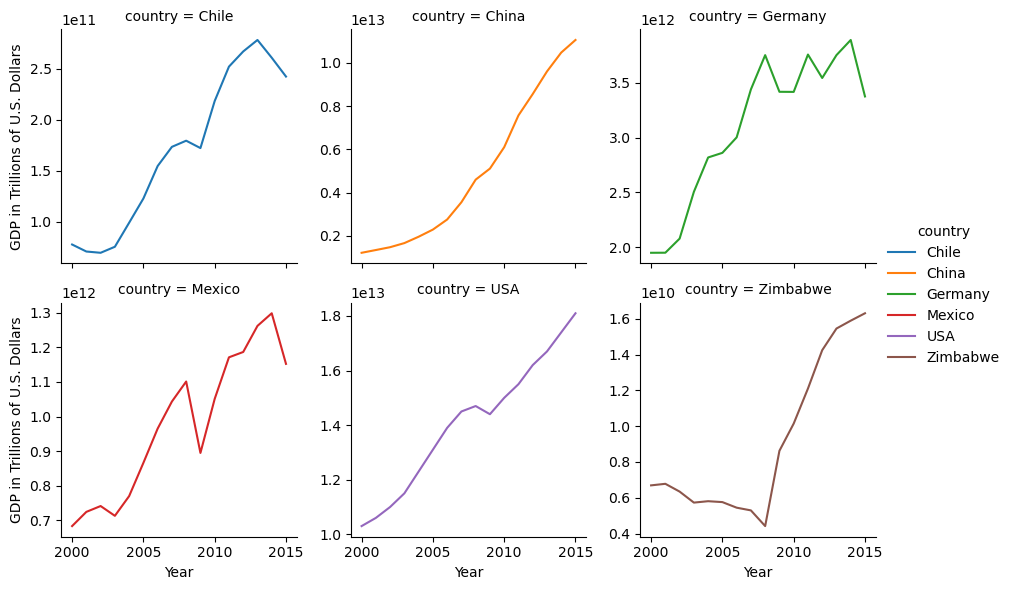

In [45]:
graphGDP = sns.FacetGrid(data, col="country", hue="country", col_wrap=3, sharey=False)

graphGDP = (graphGDP.map(sns.lineplot,"year","gdp")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))
graphGDP

## Features Relationship

The next two charts will explore the relationship between `GDP` and `LEABY`. In the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

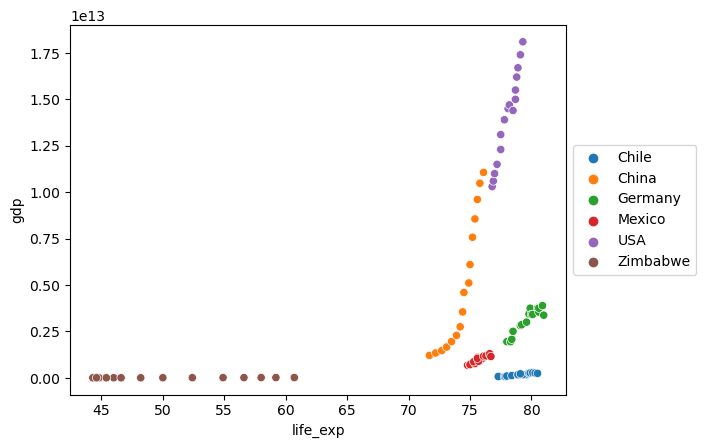

In [48]:
sns.scatterplot(x=data.life_exp, y=data.gdp, hue=data.country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

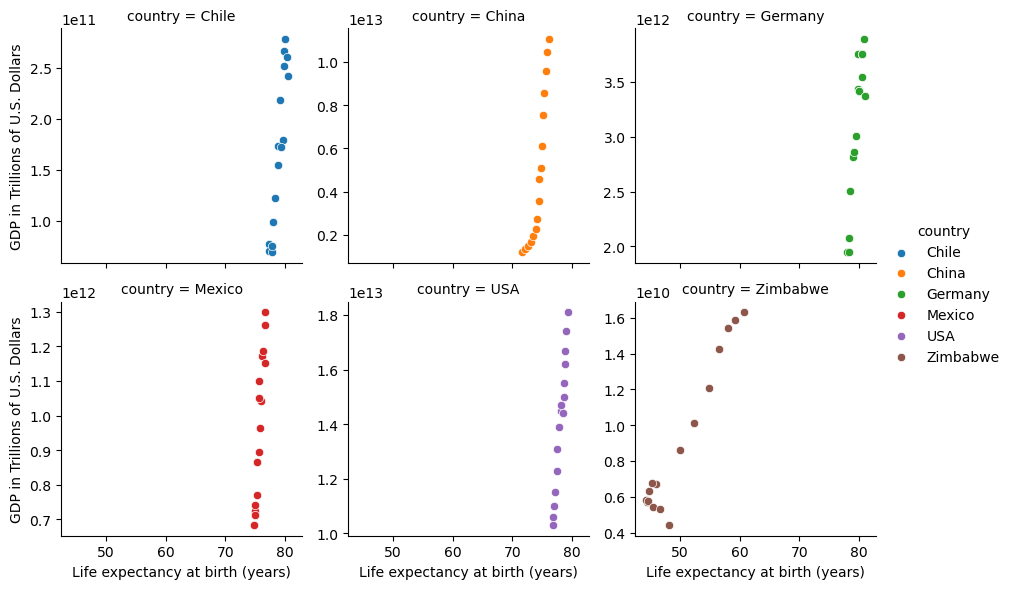

In [49]:
graph = sns.FacetGrid(data, col="country", hue="country", col_wrap=3, sharey=False)

graph = (graph.map(sns.scatterplot,"life_exp", "gdp")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"))

## Conclusions

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes. Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.